In [10]:
!pip install seaborn
!pip install ydata-profiling


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Importación de librerías

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

### Carga de los datos

Como puedes ver en la siguiente celda del notebook, **se carga el archivo .csv que se enlaza al inicio del documento**.

Sobre el dataset teneis que saber que este contiene datos de múltiples contadores, cada uno asociado a una vivienda diferente. Para diferenciar las mediciones de los diferentes contadores, lo podeis hacer a través de la variable `Código universal de punto de suministro`

In [19]:
df = pd.read_csv("electrodatos.csv")
df

,Código universal de punto de suministro,Fecha,Hora,Consumo,Método de obtención,datetime
0,0,2021-08-03,1,0.100,Real,2021-08-03 01:00:00
1,0,2021-08-03,2,0.073,Real,2021-08-03 02:00:00
2,0,2021-08-03,3,0.083,Real,2021-08-03 03:00:00
3,0,2021-08-03,4,0.073,Real,2021-08-03 04:00:00
4,0,2021-08-03,5,0.073,Real,2021-08-03 05:00:00
...,...,...,...,...,...,...
145938,10,2023-08-07,20,0.105,Real,2023-08-07 20:00:00
145939,10,2023-08-07,21,0.104,Real,2023-08-07 21:00:00
145940,10,2023-08-07,22,1.122,Real,2023-08-07 22:00:00
145941,10,2023-08-07,23,0.196,Real,2023-08-07 23:00:00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145943 entries, 0 to 145942
Data columns (total 6 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Código universal de punto de suministro  145943 non-null  int64  
 1   Fecha                                    145943 non-null  object 
 2   Hora                                     145943 non-null  int64  
 3   Consumo                                  145943 non-null  float64
 4   Método de obtención                      145943 non-null  object 
 5   datetime                                 145943 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.7+ MB


Convertimos las columnas Fecha y datetime al datetime nativo de pandas para que sea más sencillo de trabajar con las mismas.

In [21]:
df["Fecha"] = df["Fecha"].apply(lambda x: pd.Timestamp(x))
df["datetime"] = pd.to_datetime(df["datetime"])
df

,Código universal de punto de suministro,Fecha,Hora,Consumo,Método de obtención,datetime
0,0,2021-08-03,1,0.100,Real,2021-08-03 01:00:00
1,0,2021-08-03,2,0.073,Real,2021-08-03 02:00:00
2,0,2021-08-03,3,0.083,Real,2021-08-03 03:00:00
3,0,2021-08-03,4,0.073,Real,2021-08-03 04:00:00
4,0,2021-08-03,5,0.073,Real,2021-08-03 05:00:00
...,...,...,...,...,...,...
145938,10,2023-08-07,20,0.105,Real,2023-08-07 20:00:00
145939,10,2023-08-07,21,0.104,Real,2023-08-07 21:00:00
145940,10,2023-08-07,22,1.122,Real,2023-08-07 22:00:00
145941,10,2023-08-07,23,0.196,Real,2023-08-07 23:00:00


In [22]:
# Cogemos del dataframe únicamente las variables que nos interesan
dataframe = df.loc[:, ["Fecha", "Hora", "Consumo", "datetime"]]
dataframe

,Fecha,Hora,Consumo,datetime
0,2021-08-03,1,0.100,2021-08-03 01:00:00
1,2021-08-03,2,0.073,2021-08-03 02:00:00
2,2021-08-03,3,0.083,2021-08-03 03:00:00
3,2021-08-03,4,0.073,2021-08-03 04:00:00
4,2021-08-03,5,0.073,2021-08-03 05:00:00
...,...,...,...,...
145938,2023-08-07,20,0.105,2023-08-07 20:00:00
145939,2023-08-07,21,0.104,2023-08-07 21:00:00
145940,2023-08-07,22,1.122,2023-08-07 22:00:00
145941,2023-08-07,23,0.196,2023-08-07 23:00:00


# ElectroDatos
HackUDC 16, 17, 18 de febrero 2024


Este es un notebook de ejemplo para ayudarte a comenzar con el análisis del dataset. En este notebook te mostramos como puedes cargarlo y visualizarlo de forma sencilla


## Descarga de los datos
Puede descargar el dataset necesario para la ejecución de este notebook en el mismo enlace en el que has conseguido este notebook.


## Código Base

### Instalación de dependencias

[Seaborn](https://github.com/mwaskom/seaborn): Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[Ydata-profiling](https://github.com/ydataai/ydata-profiling): is a leading package for data profiling, that automates and standardizes the generation of detailed reports, complete with statistics and visualization.  Its primary goal is to provide a one-line Exploratory Data Analysis (EDA) experience in a consistent and fast solution.

### Importación de librerías

### Carga de los datos

Como puedes ver en la siguiente celda del notebook, **se carga el archivo .csv que se enlaza al inicio del documento**.

Sobre el dataset teneis que saber que este contiene datos de múltiples contadores, cada uno asociado a una vivienda diferente. Para diferenciar las mediciones de los diferentes contadores, lo podeis hacer a través de la variable `Código universal de punto de suministro`

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145943 entries, 0 to 145942
Data columns (total 6 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Código universal de punto de suministro  145943 non-null  int64         
 1   Fecha                                    145943 non-null  datetime64[ns]
 2   Hora                                     145943 non-null  int64         
 3   Consumo                                  145943 non-null  float64       
 4   Método de obtención                      145943 non-null  object        
 5   datetime                                 145943 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 6.7+ MB


In [24]:
df["Fecha"] = df["Fecha"].apply(lambda x: pd.Timestamp(x))
df["datetime"] = pd.to_datetime(df["datetime"])
df

,Código universal de punto de suministro,Fecha,Hora,Consumo,Método de obtención,datetime
0,0,2021-08-03,1,0.100,Real,2021-08-03 01:00:00
1,0,2021-08-03,2,0.073,Real,2021-08-03 02:00:00
2,0,2021-08-03,3,0.083,Real,2021-08-03 03:00:00
3,0,2021-08-03,4,0.073,Real,2021-08-03 04:00:00
4,0,2021-08-03,5,0.073,Real,2021-08-03 05:00:00
...,...,...,...,...,...,...
145938,10,2023-08-07,20,0.105,Real,2023-08-07 20:00:00
145939,10,2023-08-07,21,0.104,Real,2023-08-07 21:00:00
145940,10,2023-08-07,22,1.122,Real,2023-08-07 22:00:00
145941,10,2023-08-07,23,0.196,Real,2023-08-07 23:00:00


In [25]:
df["Código universal de punto de suministro"] = df[
    "Código universal de punto de suministro"
].astype(str)
df

,Código universal de punto de suministro,Fecha,Hora,Consumo,Método de obtención,datetime
0,0,2021-08-03,1,0.100,Real,2021-08-03 01:00:00
1,0,2021-08-03,2,0.073,Real,2021-08-03 02:00:00
2,0,2021-08-03,3,0.083,Real,2021-08-03 03:00:00
3,0,2021-08-03,4,0.073,Real,2021-08-03 04:00:00
4,0,2021-08-03,5,0.073,Real,2021-08-03 05:00:00
...,...,...,...,...,...,...
145938,10,2023-08-07,20,0.105,Real,2023-08-07 20:00:00
145939,10,2023-08-07,21,0.104,Real,2023-08-07 21:00:00
145940,10,2023-08-07,22,1.122,Real,2023-08-07 22:00:00
145941,10,2023-08-07,23,0.196,Real,2023-08-07 23:00:00


## Gráficas

/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/appu/.local/share/virtualenvs/Ha

<Axes: xlabel='datetime', ylabel='Consumo'>

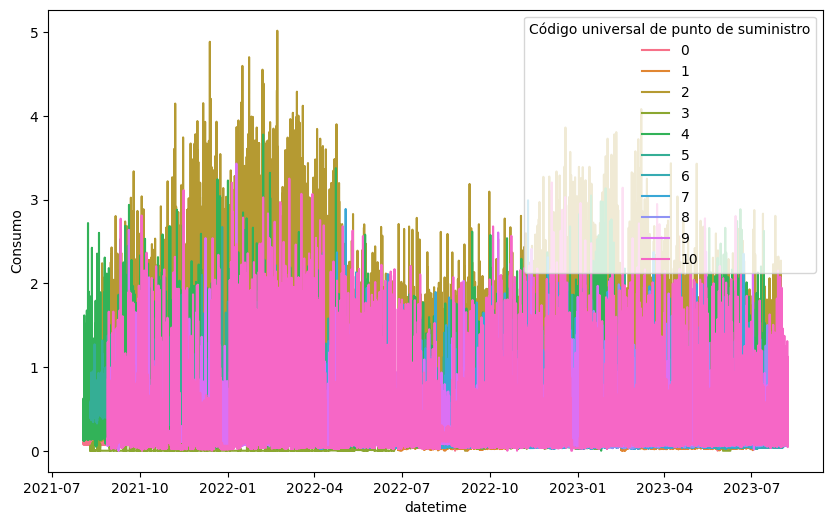

In [26]:
# Set the figure size
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df, x="datetime", y="Consumo", hue="Código universal de punto de suministro"
)

/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='datetime', ylabel='Consumo'>

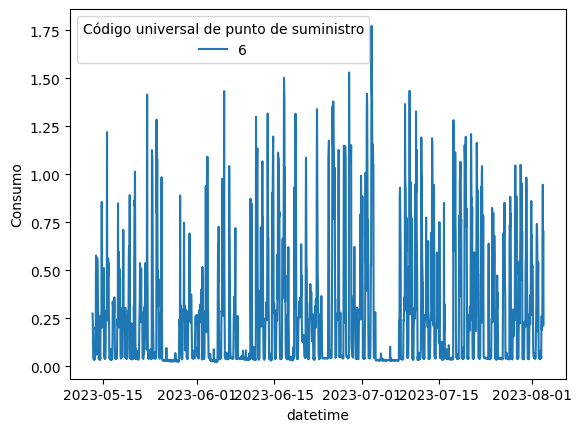

In [27]:
sns.lineplot(
    data=df[df["Código universal de punto de suministro"] == "6"],
    x="datetime",
    y="Consumo",
    hue="Código universal de punto de suministro",
)

Graficamos filtrando entre fechas.

Queremos todos los puntos de suministro pero únicamente del 1 al 7 de mayo de 2023

/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/appu/.local/share/virtualenvs/HackUDC-yPNWppD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/appu/.local/share/virtualenvs/Ha

<Axes: xlabel='datetime', ylabel='Consumo'>

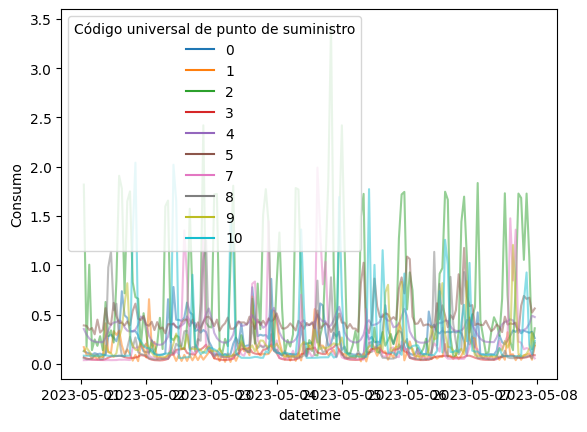

In [28]:
sns.lineplot(
    data=df[(df["datetime"] > "2023-05-01") & (df["datetime"] < "2023-05-08")],
    x="datetime",
    y="Consumo",
    hue="Código universal de punto de suministro",
    alpha=0.5,
)

¿Cuáles son los últimos datos del punto de suministro 6?

Filtramos por punto de suministro y obtenemos su cola (tail)

In [29]:
df[df["Código universal de punto de suministro"] == "6"].tail()

,Código universal de punto de suministro,Fecha,Hora,Consumo,Método de obtención,datetime
94867,6,2023-08-02,20,0.626,Real,2023-08-02 20:00:00
94868,6,2023-08-02,21,0.945,Real,2023-08-02 21:00:00
94869,6,2023-08-02,22,0.430,Real,2023-08-02 22:00:00
94870,6,2023-08-02,23,0.210,Real,2023-08-02 23:00:00
94871,6,2023-08-02,24,0.700,Real,2023-08-03 00:00:00


*¿Cuál* es el día más reciente del que tenemos datos?

Simplemente obtenemos el valor máximo de la columna Fecha

In [30]:
df["Fecha"].max()

Timestamp('2023-08-07 00:00:00')

## EDA automático

¿Y no me pueden dar esa información de manera automática?

Para eso tenemos ydata-profiling, una librería que nos permite hacer un análisis exploratorio (EDA) de una manera sencilla. ¿Qué datos nos ofrece? ¡Veámoslo!

In [31]:
profile = ProfileReport(df, title="Report Contadores Luz")
profile

ModuleNotFoundError: No module named 'ipywidgets'